# 이미지 데이터 불러오기
# Pillow OR opencv-python (cv2) OR scikit-image
https://antilibrary.org/1956

In [1]:
!pip3 install pillow

In [3]:
!pip install opencv-python

In [10]:
!pip install scikit-image

In [11]:
from skimage import io

In [4]:
import cv2

In [5]:
img = cv2.imread('C:/Users/ohi02/Desktop/개인정보/취업사진_파랑.jpg')

In [10]:
cv2.imshow("img", img) #이미지보여주기창 이름, 객체이름

error: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-52oirelq\opencv\modules\highgui\src\window.cpp:376: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'


# MNIST 데이터 다운(test sample)

In [2]:
import tensorflow as tf

In [25]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
import matplotlib.pyplot as plt

In [5]:
print("Y TRAIN [0]: ", y_train[0]) #Train data - Y 첫번째 답 확인

Y TRAIN [0]:  5


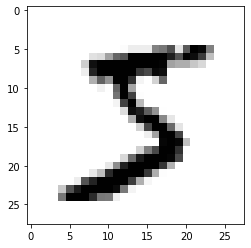

In [6]:
plt.imshow(x_train[0], cmap = plt.cm.gray_r, interpolation = "nearest")

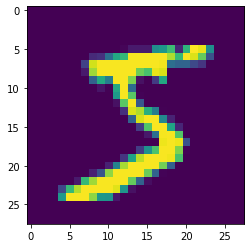

In [7]:
plt.imshow(x_train[0])

In [8]:
print(x_train.shape) 
print(y_train.shape)

(60000, 28, 28)
(60000,)


# 데이터 전처리 - 정규화
0 ~ 1 사이의 값으로 정규화(Normalization) 하기 

MNIST 데이터셋은 0~255사이의 값을 갖고 있는 한개의 픽셀이 28개* 28개 조합으로 이루어짐.
6만개는 학습용, 1만개는 테스트용

In [8]:
x_train, x_test = x_train / 255.0, x_test/255.0

Tensorflow: to_categorical 사용

sklearn : LabelEncoder , OneHotEncoder 사용

https://teddylee777.github.io/scikit-learn/labelencoder-%EC%82%AC%EC%9A%A9%EB%B2%95

In [9]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [15]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [13]:
import tensorflow as tf
y_test3 = tf.keras.utils.to_categorical(y_test,10)
y_test3

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [14]:
y_test3[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [16]:
y_test[0]

7

In [32]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
le = LableEncoder()
enc = OneHotEncoder()
le = le.fit(y_test)
enc.fit(y_test)

# 기본 분류기 
0~9까지 분류하기
독립변수의 갯수: 28X28픽셀의 784개 픽셀
https://laboputer.github.io/machine-learning/2020/03/12/mnist995/
https://ko.d2l.ai/chapter_deep-learning-basics/fashion-mnist.html

# 1.1 Scikit Learn (sklearn.linear_model) 로지스틱 회귀
http://hleecaster.com/ml-logistic-regression-example/

# 1.2 랜덤포레스트: 앙상블 방법
https://myjamong.tistory.com/79

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [27]:
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(x_train, y_train)

ValueError: Found array with dim 3. Estimator expected <= 2.

In [22]:
predicted = rf.predict(x_test)
accuracy = metrics.accuracy_score(y_test, predicted)

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [23]:
from sklearn.datasets import load_iris
iris = load_iris()
iris_x_train = iris.data[:-30]

In [24]:
iris_x_train[0]

array([5.1, 3.5, 1.4, 0.2])

# 디렉토리에서 이미지 가져와서 과일종류 예측 모델 학습하기

In [33]:
import os
from PIL import Image
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.externals import joblib
from sklearn.svm import SVC

C:\Users\ohi02\Anaconda3\envs\py37\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [ ]:
for file in files:
    file_path = '{}/{}/{}'.format(data_dir, folder_name, files)